# Importing Data from Kaggle to further processing it

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d alvinbintang/sibi-dataset

100% 2.69G/2.70G [00:25<00:00, 149MB/s]
100% 2.70G/2.70G [00:25<00:00, 113MB/s]


#Importing the necessary Library


In [ ]:
#Importing the necessary Library
import tensorflow as tf
import zipfile,os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Exctracting the Picture Data from kaggle


In [ ]:
# Exctracting the Picture Data from kaggle
import os
import zipfile

local_zip = '/content/sibi-dataset.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/content/sibi-dataset')
zip_ref.close()

In [ ]:
#Unpacking the the extracting data and putting it in list
data_dir = '/content/sibi-dataset'

images = []
labels = []
label = []
for path, subdirs, files in os.walk(data_dir):
    for name in files:
        label.append(os.path.join(path, name))
        labels.append(path.split('/')[-1])
        images.append(name)

#Using DataFrame Object to Preprocessing the data from list to Tabular Data Format


In [ ]:
#Using DataFrame Object to Preprocessing the data from list to Tabular Data Format
df = pd.DataFrame({"path":label,'file_name':images,"tag":labels})
df.head()

,path,file_name,tag
0,/content/sibi-dataset/SIBI/M/IMG_20220221_1030...,IMG_20220221_103051.jpg,M
1,/content/sibi-dataset/SIBI/M/1645708434.177779...,1645708434.1777792.jpg,M
2,/content/sibi-dataset/SIBI/M/IMG_20220224_1725...,IMG_20220224_172507.jpg,M
3,/content/sibi-dataset/SIBI/M/1645946818.715441...,1645946818.7154415_M.jpg,M
4,/content/sibi-dataset/SIBI/M/20201018_121250_0...,20201018_121250_013.jpg,M


In [ ]:
#Checking the Distribution of Data from Tag
df.groupby(['tag']).size()

tag
A    220
B    220
C    220
D    220
E    220
F    220
G    220
H    220
I    220
K    220
L    220
M    220
N    220
O    220
P    220
Q    220
R    220
S    220
T    220
U    220
V    220
W    220
X    220
Y    220
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5280 entries, 0 to 5279
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   path       5280 non-null   object
 1   file_name  5280 non-null   object
 2   tag        5280 non-null   object
dtypes: object(3)
memory usage: 123.9+ KB


# Splitting the data Training, Validation, Test Data

In [ ]:
X= df['path']
y= df['tag']

# Split dataset to become training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=300)

 #Test dataset divided equally
X_test, X_val, y_test, y_val_a= train_test_split(
    X_test, y_test, test_size=0.5, random_state=100)

In [ ]:
#Checking the result of Splitting data
df_train = pd.DataFrame({'path':X_train
              ,'tag':y_train
             ,'set':'train'})

df_test = pd.DataFrame({'path':X_test
              ,'tag':y_test
             ,'set':'test'})

df_val = pd.DataFrame({'path':X_val
              ,'tag':y_val_a
             ,'set':'validation'})

print('train size', len(df_train))
print('val size', len(df_test))
print('test size', len(df_val))

train size 3696
val size 792
test size 792


In [ ]:
# Checking the proportion set of the data between validation and test data
df_all = df_train.append([df_test,df_val]).reset_index(drop=1)\

print('===================================================== \n')
print(df_all.groupby(['set','tag']).size(),'\n')

print('===================================================== \n')

#cek sample datanya
df_all.sample(3)


set         tag
test        A      35
            B      24
            C      27
            D      36
            E      48
                   ..
validation  U      37
            V      35
            W      33
            X      26
            Y      32
Length: 72, dtype: int64 




<ipython-input-14-fadd3063fe99>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df_train.append([df_test,df_val]).reset_index(drop=1)\


,path,tag,set
3930,/content/sibi-dataset/SIBI/G/1645715733.260204...,G,test
3111,/content/sibi-dataset/SIBI/I/IMG_20220221_1047...,I,train
2668,/content/sibi-dataset/SIBI/Q/1645716057.936221...,Q,train


#Creating the Folder Dataset for Training, Validation, Test Data

In [ ]:
import shutil
from tqdm.notebook import tqdm as tq

dataset_path = "content/dataset/"
for index, row in tq(df_all.iterrows()):

    #detect filepath
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(data_dir,row['tag'],row['image'].split('.')[0])

    #make folder destination dirs
    if os.path.exists(os.path.join(data_dir,row['set'],row['tag'])) == False:
        os.makedirs(os.path.join(data_dir,row['set'],row['tag']))

    #define file dest
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(data_dir,row['set'],row['tag'],destination_file_name)

    #copy file from source to dest
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

0it [00:00, ?it/s]

# YEAAAA BEYBEEHH, WE GO TRAINING!

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

train_data_dir = '/content/sibi-dataset/train'
validation_data_dir = '/content/sibi-dataset/validation'
test_data_dir = '/content/sibi-dataset/test'

batch_size = 256
image_size = (224, 224)
num_classes = 24


train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   rotation_range = 25,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)



validation_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

# Loading data with tensorflow
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 3696 images belonging to 24 classes.
Found 792 images belonging to 24 classes.
Found 792 images belonging to 24 classes.


# Using Transfer Learning Method, MobileNetV2 and fine-tuning it

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

base_model = MobileNetV2(include_top=False,
                         weights='imagenet',
                         input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

modelmn2 = Sequential([base_model,
                       GlobalAveragePooling2D(),
                       Dense(1024, activation='relu'),
                       Dropout(0.5),
                       Dense(24, activation = 'softmax')
])

# Mengompilasi model
modelmn2.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['Accuracy'])

# Menampilkan ringkasan model
modelmn2.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1024)              1311744   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 24)                24600     
                                                           

# ADAM ALGOOOOO GO BRRRRRR!!!!!!!!!!!!!!!!!!!

In [ ]:
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size
epochs = 50

# Melatih model menggunakan generator data
history = modelmn2.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=validation_steps)

<ipython-input-18-9816d1db7ba3>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = modelmn2.fit_generator(


Epoch 1/50
14/14 [==============================] - 169s 11s/step - loss: 2.6728 - Accuracy: 0.2535 - val_loss: 1.5289 - val_Accuracy: 0.5898
Epoch 2/50
14/14 [==============================] - 151s 11s/step - loss: 1.5353 - Accuracy: 0.5346 - val_loss: 0.9858 - val_Accuracy: 0.7044
Epoch 3/50
14/14 [==============================] - 167s 12s/step - loss: 1.1197 - Accuracy: 0.6567 - val_loss: 0.6868 - val_Accuracy: 0.8268
Epoch 4/50
14/14 [==============================] - 149s 11s/step - loss: 0.9411 - Accuracy: 0.6948 - val_loss: 0.6005 - val_Accuracy: 0.8255
Epoch 5/50
14/14 [==============================] - 148s 11s/step - loss: 0.8036 - Accuracy: 0.7483 - val_loss: 0.4897 - val_Accuracy: 0.8672
Epoch 6/50
14/14 [==============================] - 148s 11s/step - loss: 0.7219 - Accuracy: 0.7706 - val_loss: 0.4751 - val_Accuracy: 0.8724
Epoch 7/50
14/14 [==============================] - 161s 12s/step - loss: 0.6617 - Accuracy: 0.7869 - val_loss: 0.4248 - val_Accuracy: 0.8750
Epoch 

# Checking the Loss and Accuracy visualization of the resulted Training

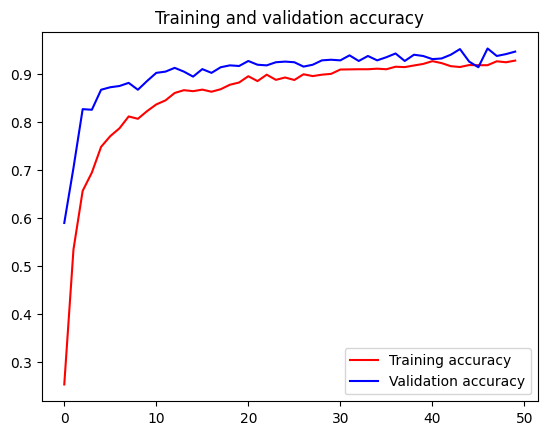

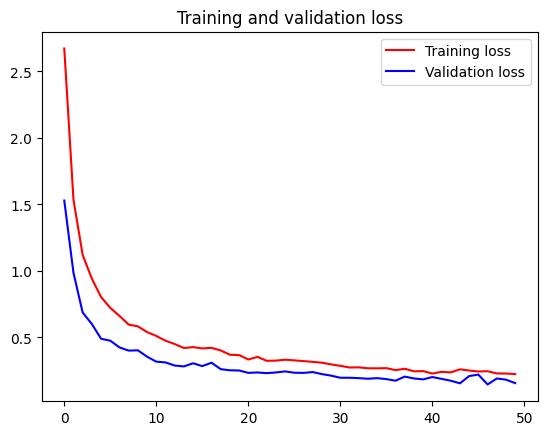

In [ ]:
history = modelmn2.history

acc = history.history['Accuracy']
val_acc = history.history['val_Accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.savefig('MobileVnet2-percobaan_accuracy3.png')
plt.figure()


plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.savefig('MobileVnet2-percobaan_loss3.png')
plt.show()


In [ ]:
loss, acc = modelmn2.evaluate(train_generator,steps=len(train_generator),verbose=0)
print('Accuracy on training data: {:.4f} \nLoss on training data: {:.4f}'.format(acc,loss),'\n')

loss, acc = modelmn2.evaluate(test_generator,steps=len(test_generator),verbose=0)
print('Accuracy on test data: {:.4f} \nLoss on test data: {:.4f}'.format(acc,loss),'\n')

Accuracy on training data: 0.9583 
Loss on training data: 0.1434 

Accuracy on test data: 0.9470 
Loss on test data: 0.1803 



#Saving the data

In [ ]:
MODEL_BASE_PATH = "model"
PROJECT_NAME = "medium_project"
SAVE_MODEL_NAME = "model-percobaan3-MobileNetV2.h5"
save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)
if os.path.exists(os.path.join(MODEL_BASE_PATH, PROJECT_NAME)) == False:
    os.makedirs(os.path.join(MODEL_BASE_PATH, PROJECT_NAME))

print('Saving Model At {}...'.format(save_model_path))
modelmn2.save(save_model_path,include_optimizer=False)

Saving Model At model/medium_project/model-percobaan3-MobileNetV2.h5...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
